In [1]:
#Predicting the price of natural gas based on end month prices. The monthly data is used to fit a SARIMA model
#Then the monthly values are interpolated. It is faster and simpler than fitting a sine function.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
data = pd.read_csv("/Users/gadimg/Downloads/Nat_Gas.csv", parse_dates = ['Dates'], dayfirst = False)
data.set_index('Dates', inplace=True)
data = data.asfreq('M')
daily_data = data.resample('D').interpolate(method='linear')

<ipython-input-4-16862a250ddf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("/Users/gadimg/Downloads/Nat_Gas.csv", parse_dates = ['Dates'], dayfirst = False)


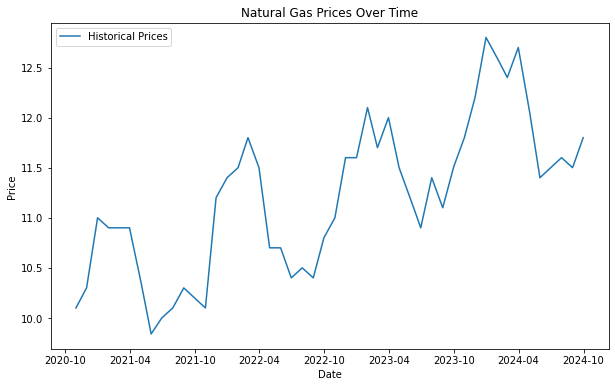

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Prices'], label="Historical Prices")
plt.title("Natural Gas Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed

plt.legend()
plt.show()

In [22]:
# Fit SARIMA model on monthly data, then will interpolate to get the monthly numbers. 
#This method is faster and gives reasonable results
sarima_model = SARIMAX(data['Prices'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for 12 months ahead 
forecast_steps = 12  # Adjust as needed
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_data = pd.Series(forecast.predicted_mean, index=forecast_index)

/Users/gadimg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


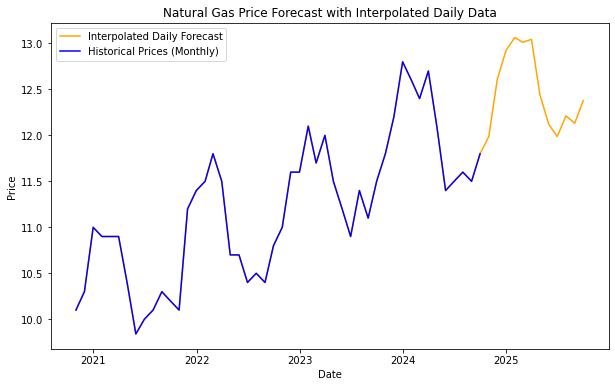

In [24]:
combined_data = pd.concat([data['Prices'], forecast_data])

# Interpolate the combined data to daily frequency. 
daily_forecast = combined_data.resample('D').interpolate(method='linear')

# Plot the historical data, monthly forecast, and interpolated daily forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_forecast, label="Interpolated Daily Forecast", color='orange')
plt.plot(data['Prices'], label="Historical Prices (Monthly)", color='blue')
plt.title("Natural Gas Price Forecast with Interpolated Daily Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [27]:
def estimate_price(date_str):
    date = pd.to_datetime(date_str)
    
    # Check if the date is within the historical data range
    if date in data.index:
        return data.loc[date, 'Prices']
    
    # Check if the date is within the interpolated daily forecast range
    elif date in daily_forecast.index:
        return daily_forecast.loc[date]
    
    # Date is out of both historical and forecast ranges
    else:
        return "Date is out of forecast range"

In [28]:
estimate_price("10-10-2024")

11.860406422366925